# Generar reportes

In [1]:
#Fase 6: Visualización de Datos desde MongoDB
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Conectar a MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["SaludDigital_2025"]
collection = db["pacientes"]

In [3]:
#Leer los datos desde MongoDB y convertirlos a DataFrame
data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)

print(" Datos cargados desde MongoDB correctamente.")
print(f"Total de registros: {len(df)}\n")

#Vista previa
print("Vista previa de los datos:\n")
print(df.head())

#Crear carpeta para guardar gráficos
reports_path = Path.cwd() / "../reports"
reports_path.mkdir(parents=True, exist_ok=True)

 Datos cargados desde MongoDB correctamente.
Total de registros: 6000

Vista previa de los datos:

  id_paciente                 nombre  edad sexo    Distrito      servicio  \
0        P001         Paciente Juan     15    M  Miraflores  Dermatología   
1        P002   Paciente Luis García    72    F      Callao     Pediatría   
2        P003  Paciente Maria García    86    M  Miraflores     Pediatría   
3        P004    Paciente Juan Pérez    88    M       Surco   Cardiología   
4        P005    Paciente Luis Pérez    26    M   Cajamarca     Pediatría   

  fecha_atencion       monto  
0     2024-11-15  403.980000  
1     2020-04-14  270.564304  
2     2020-05-24  158.020000  
3     2022-08-30  404.190000  
4     2024-05-05  349.040000  


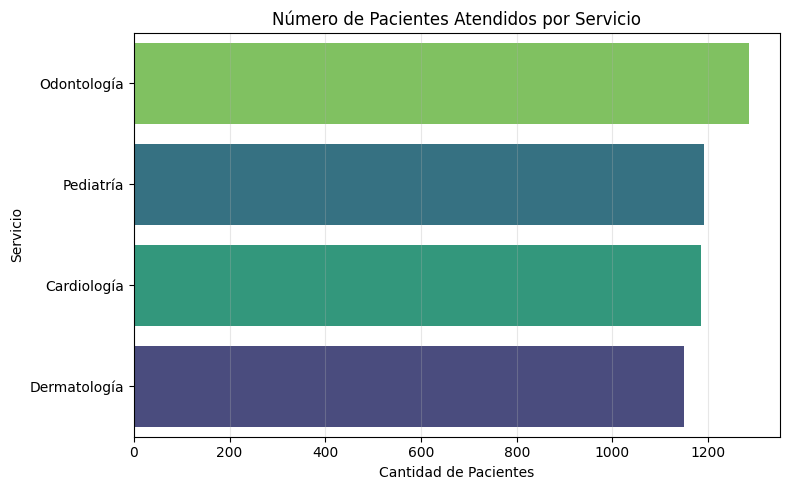

In [4]:
#Gráfico de barras: Número de pacientes atendidos por servicio
plt.figure(figsize=(8,5))
sns.countplot(
    y="servicio",
    hue="servicio",
    data=df,
    order=df["servicio"].value_counts().index,
    palette="viridis",
    legend=False
)
plt.title("Número de Pacientes Atendidos por Servicio")
plt.xlabel("Cantidad de Pacientes")
plt.ylabel("Servicio")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "pacientes_atendidos_por_servicio.png")
plt.show()

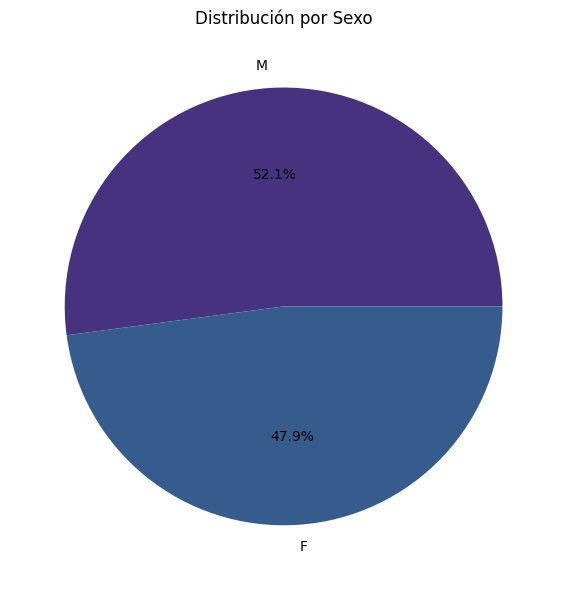

In [5]:
#2. Gráfico circular: Distribución por sexo
sexo_counts = df["sexo"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"))
plt.title("Distribución por Sexo")
plt.tight_layout()
plt.savefig(reports_path / "distribucion_por_sexo.png")
plt.show()

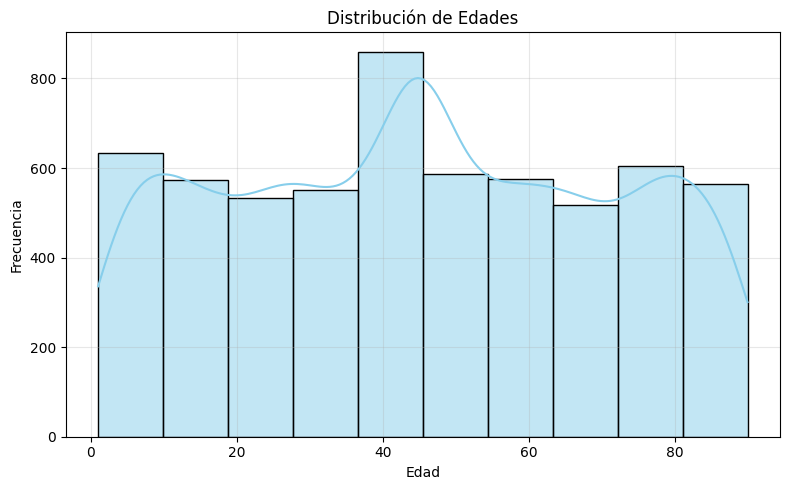

In [6]:
#3. Histograma: Distribución de edades
plt.figure(figsize=(8,5))
sns.histplot(df["edad"], bins=10, kde=True, color='skyblue')
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "distribucion_de_edades.png")
plt.show()

In [7]:
#4. Reporte tabular: Promedio de montos por distrito
promedio_distrito = df.groupby("Distrito")["monto"].mean().sort_values(ascending=False)
df_prom = promedio_distrito.reset_index()
df_prom.columns = ["Distrito", "PromedioMonto"]
print("\nPromedio de Montos por Distrito:\n", df_prom)


Promedio de Montos por Distrito:
      Distrito  PromedioMonto
0       Lince     275.337548
1  San Isidro     273.769925
2   Cajamarca     272.056681
3   La Molina     269.841377
4       Surco     269.416889
5  Miraflores     266.642675
6      Callao     266.152337


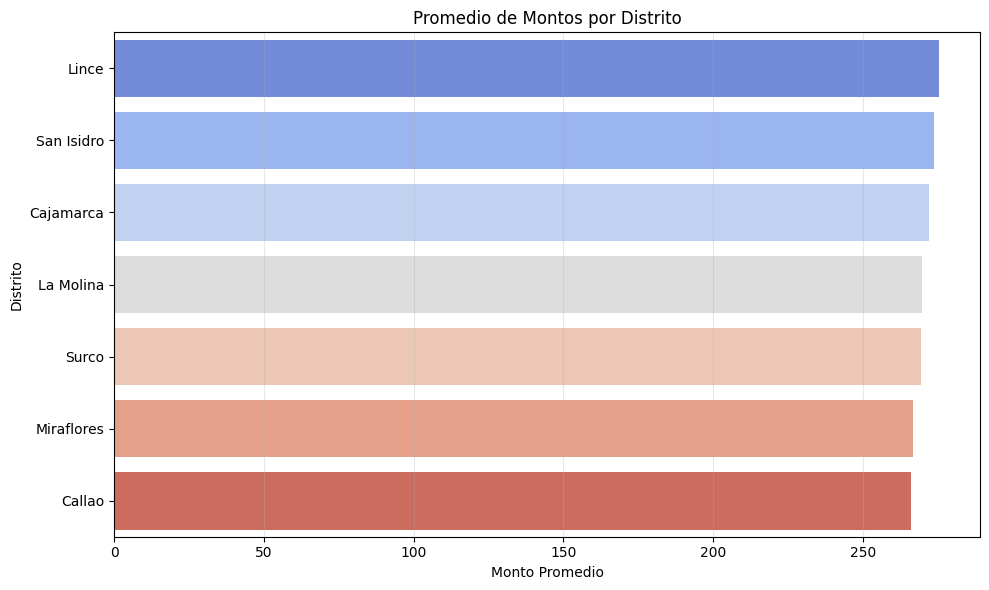

In [8]:
# Guardar como imagen (opcional, pero para reports)
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_prom,
    x="PromedioMonto",
    y="Distrito",
    hue="Distrito",
    palette="coolwarm",
    legend=False
)
plt.title("Promedio de Montos por Distrito")
plt.xlabel("Monto Promedio")
plt.ylabel("Distrito")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "promedio_de_montos_por_distrito.png")
plt.show()